## Database

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline

Databases de cada Local para facilitar a limpeza e padronização dos dataframes

In [27]:
#Lendo a base de dados
#df1=pd.read_csv('Focos_2018-12-31_2019-12-31.csv', low_memory=False)
#df2=pd.read_csv('Focos_2020-01-01_2020-10-04.csv', low_memory=False)
df=pd.read_csv("brasil-Focos_2019-10-04_2020-10-04.csv", low_memory=False)

In [28]:
#frames=[df1,df2]
#df = pd.concat(frames)

In [29]:
#demonstrando dados iniciais
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,IBIAI,Cerrado,7.0,8.1,0.4,-16.916,-44.824,157.3
1,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,IBIAI,Cerrado,9.0,7.7,0.5,-16.917,-44.834,36.6
2,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,FRANCISCOPOLIS,Mata Atlantica,15.0,28.5,0.0,-18.018,-42.134,12.1
3,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,TEOFILO OTONI,Mata Atlantica,8.0,28.8,0.0,-18.023,-41.505,9.4
4,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,PRESIDENTE OLEGARIO,Cerrado,5.0,3.4,0.2,-18.151,-46.168,11.1


In [38]:
#Retirando variáveis desnecessárias e separando a data e a hora
df[['data','hora']] = df.datahora.str.split(" ",expand=True,)
df_novo=df.drop(["datahora","satelite","bioma","municipio","estado","frp"], axis=1)

df.novo=df_novo.dropna(how='any', inplace=True)
indexNames = df_novo[ (df_novo['diasemchuva'] < 0) | (df_novo['riscofogo'] < 0) ].index
df_novo.drop(indexNames , inplace=True)
#df_novo=df_novo.replace(-999, 0)

In [41]:
df_novo['hora'] = df_novo['hora'].str.replace(r'\D', '')
df_novo['data'] = df_novo['data'].str.replace(r'\D', '')
#df_novo.data = [x.strip('2020') for x in df_novo.data]
#df_novo.data = [x.strip('2019') for x in df_novo.data]
df_novo['hora'].astype(str).astype(int)
df_novo.head()

,pais,diasemchuva,precipitacao,riscofogo,latitude,longitude,data,hora
0,Brasil,7.0,8.1,0.4,-16.916,-44.824,20191022,164000
1,Brasil,9.0,7.7,0.5,-16.917,-44.834,20191022,164000
2,Brasil,15.0,28.5,0.0,-18.018,-42.134,20191022,164000
3,Brasil,8.0,28.8,0.0,-18.023,-41.505,20191022,164000
4,Brasil,5.0,3.4,0.2,-18.151,-46.168,20191022,164000


In [46]:
df_novo=df_novo.replace(df_novo.hora>60000, "Dia")

TypeError: '>' not supported between instances of 'str' and 'int'

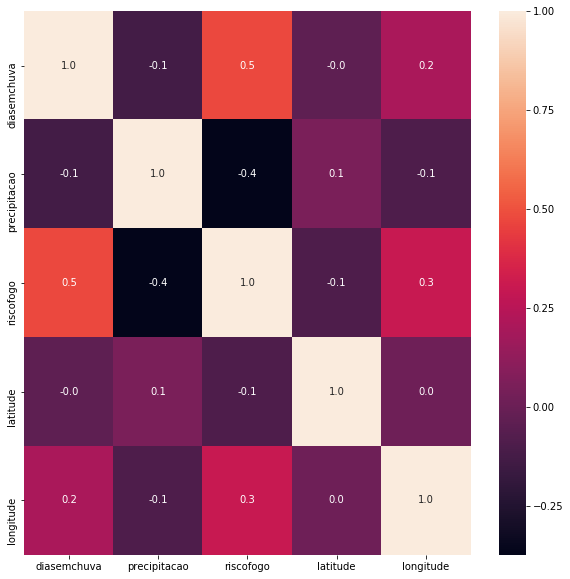

In [8]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_novo.corr(),annot= True, fmt='.1f')

In [9]:
'''fig=plt.figure(figsize=(10,10))

#Riscofogo X Precipitação
plt.subplot(221)
plt.scatter(df_novo.riscofogo,df_novo.precipitacao)
plt.title("Riscofogo X Precipitação")
plt.ylabel("Precipitação")
plt.xlabel("Risco de Fogo")

#Riscofogo X Dias Sem chuva
plt.subplot(222)
plt.scatter(df_novo.riscofogo,df_novo.diasemchuva)
plt.title("Riscofogo X Dias Sem chuva")
plt.ylabel("Dias sem chuva")
plt.xlabel("Risco de Fogo")

#Riscofogo X Latitude
plt.subplot(223)
plt.scatter(df_novo.riscofogo,df_novo.latitude)
plt.title("Riscofogo X Latitude")
plt.ylabel("Latitude")
plt.xlabel("Risco de Fogo")

#Riscofogo X Longitude
plt.subplot(224)
plt.scatter(df_novo.riscofogo,df_novo.longitude)
plt.title("Riscofogo X Longitude")
plt.ylabel("Longitude")
plt.xlabel("Risco de Fogo")

plt.show()'''

'fig=plt.figure(figsize=(10,10))\n\n#Riscofogo X Precipitação\nplt.subplot(221)\nplt.scatter(df_novo.riscofogo,df_novo.precipitacao)\nplt.title("Riscofogo X Precipitação")\nplt.ylabel("Precipitação")\nplt.xlabel("Risco de Fogo")\n\n#Riscofogo X Dias Sem chuva\nplt.subplot(222)\nplt.scatter(df_novo.riscofogo,df_novo.diasemchuva)\nplt.title("Riscofogo X Dias Sem chuva")\nplt.ylabel("Dias sem chuva")\nplt.xlabel("Risco de Fogo")\n\n#Riscofogo X Latitude\nplt.subplot(223)\nplt.scatter(df_novo.riscofogo,df_novo.latitude)\nplt.title("Riscofogo X Latitude")\nplt.ylabel("Latitude")\nplt.xlabel("Risco de Fogo")\n\n#Riscofogo X Longitude\nplt.subplot(224)\nplt.scatter(df_novo.riscofogo,df_novo.longitude)\nplt.title("Riscofogo X Longitude")\nplt.ylabel("Longitude")\nplt.xlabel("Risco de Fogo")\n\nplt.show()'

Text(0.5,1,'Probplot:Longitude')

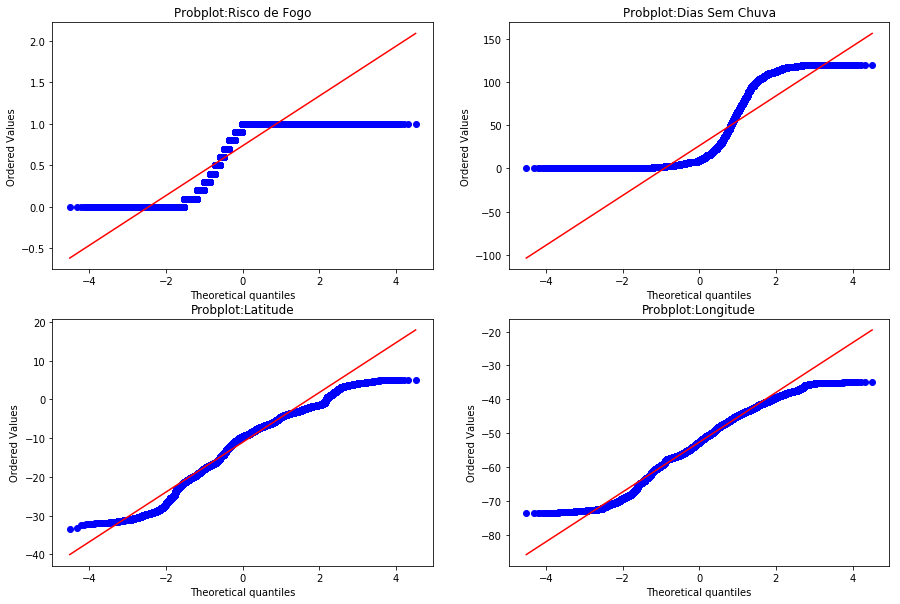

In [10]:
fig=plt.figure(figsize=(15,10))

plt.subplot(221)
stats.probplot(df_novo.riscofogo, plot = plt )
plt.title("Probplot:Risco de Fogo")

plt.subplot(222)
stats.probplot(df_novo.diasemchuva, plot = plt )
plt.title("Probplot:Dias Sem Chuva")

plt.subplot(223)
stats.probplot(df_novo.latitude, plot = plt )
plt.title("Probplot:Latitude")

plt.subplot(224)
stats.probplot(df_novo.longitude, plot = plt )
plt.title("Probplot:Longitude")

In [11]:
#Salvando base de dados como CSV
#df_novo.to_csv('BaseDeDados.csv')